# Determining House Value in California, 1990

In [15]:
# This dataset is based on data from the 1990 California Census for each block group in California.
## Each block has approximately 600-3000 people.

# This project is to analyze the factors of house values in 1990 California, from median income to ocean proximity.

Source of Data: **<a href="https://www.kaggle.com/datasets/kathuman/housing" target="_blank">Kaggle</a>**

**1) Importing Libraries**

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf

**2) Observing our Dataset**

In [17]:
df = pd.read_csv("housing_original.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,near_bay
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,near_bay
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,near_bay
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,near_bay
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,near_bay
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,inland
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,inland
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,inland
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,inland


In [18]:
# Explanation of each columns:

## 'longitude'          : angular distance from Greenwich, UK on determining how west or east a location is
## 'latitude'           : angular distance from the equator on determining how north or south a location is
## 'housing_median_age' : the median age of the houses in each block (years)
## 'total_rooms'        : total amount of rooms in the houses in each block
## 'total_bedrooms'     : total amount of bedrooms in the houses in each block
## 'population'         : total population in each block
## 'households'         : total amount of houses in each block
## 'median_income'      : median hourly income per capita of the population in each block
## 'median_house_value' : median house value in each block
## 'ocean_proximity'    : the location of each block from the ocean or any body of water

**3) Describing our Dataset**

In [19]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [20]:
# 'ocean_proximity' is the only column not containing floats or integers, and it will be a categorical variable (or dummy variable).

# Our data cleaning process includes an outlier detection. However, outliers do not exist when dealing with categorical data.
# During our outlier detection, with the IQR method, this could cause errors when we include categorical data.

# As a solution, I separated the 'ocean_proximity' column from the main dataset, and created a new dataset 'ocean_proximity.csv', containing only that column.
# I also created a new dataset 'housing.csv', which has every column excluding 'ocean_proximity'.

# Once I finished the outlier detection, I will merge the 'ocean_proximity' column into the cleaned dataset.
# For a successful dataset merge, I've added a number column on the left-hand side of each datasets, which will act as the common column.
## This idea applies the exact same logic from SQL when joining a table into another table, which works when there is a common column.

**4) Data Cleaning #1: Separating 'ocean_proximity' from the Dataset**

In [21]:
df_0 = pd.read_csv("housing.csv")
df_1 = pd.read_csv("ocean_proximity.csv")
# a number column is added on the left-hand side of each datasets

display(df_0, df_1)

,no,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,2,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,3,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,4,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,5,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...,...
20635,20636,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,20637,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,20638,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,20639,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


,no,ocean_proximity
0,1,near_bay
1,2,near_bay
2,3,near_bay
3,4,near_bay
4,5,near_bay
...,...,...
20635,20636,inland
20636,20637,inland
20637,20638,inland
20638,20639,inland


In [22]:
# Since 'ocean_proximity' has been separated from the main dataset, we can start cleaning the main dataset.

**5) Data Cleaning #2: Dropping Unnecessary Columns & Creating New Columns**

In [23]:
df_2 = df_0.copy() # make a copy of the dataset, so we can revert back to the original dataset if needed

df_3 = df_2.drop(columns=['longitude','latitude','total_rooms','total_bedrooms','population','households']) # these columns are irrelevant for us

df_3["avg_rooms_per_household"] = df_2["total_rooms"] / df_2["households"]
df_3["avg_bedrooms_per_household"] = df_2["total_bedrooms"] / df_2["households"]
df_3["avg_residents_per_household"] = df_2["population"] / df_2["households"]
# these new columns can be interesting for analysis (their relevance can be tested using regression analysis)

df_3

,no,housing_median_age,median_income,median_house_value,avg_rooms_per_household,avg_bedrooms_per_household,avg_residents_per_household
0,1,41,8.3252,452600,6.984127,1.023810,2.555556
1,2,21,8.3014,358500,6.238137,0.971880,2.109842
2,3,52,7.2574,352100,8.288136,1.073446,2.802260
3,4,52,5.6431,341300,5.817352,1.073059,2.547945
4,5,52,3.8462,342200,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...
20635,20636,25,1.5603,78100,5.045455,1.133333,2.560606
20636,20637,18,2.5568,77100,6.114035,1.315789,3.122807
20637,20638,17,1.7000,92300,5.205543,1.120092,2.325635
20638,20639,18,1.8672,84700,5.329513,1.171920,2.123209


**6) Data Cleaning #3a: Finding Outliers using the Interquartile Range (IQR) Method**

In [24]:
q1 = df_3.quantile(0.25)
q3 = df_3.quantile(0.75)
IQR = q3-q1

lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR

outliers = df_3[(df_3 < lower_limit) | (df_3 > upper_limit)]

outliers.count()

no                                0
housing_median_age                0
median_income                   681
median_house_value             1071
avg_rooms_per_household         511
avg_bedrooms_per_household     1413
avg_residents_per_household     711
dtype: int64

In [25]:
# As we can see, there are some outliers on most columns (ignoring the number column), which needs to be dropped.

**7) Data Cleaning #3b: Dropping the Outliers**

In [26]:
df_4 = df_3[(df_3 >= lower_limit) & (df_3 <= upper_limit)]
# we only want values between the lower and upper limits, and outside of that will become null values

df_5 = df_4.dropna() # dropping the null values, which were previously outliers

display(df_5,df_5.count())

,no,housing_median_age,median_income,median_house_value,avg_rooms_per_household,avg_bedrooms_per_household,avg_residents_per_household
2,3,52,7.2574,352100.0,8.288136,1.073446,2.802260
3,4,52,5.6431,341300.0,5.817352,1.073059,2.547945
4,5,52,3.8462,342200.0,6.281853,1.081081,2.181467
5,6,52,4.0368,269700.0,4.761658,1.103627,2.139896
6,7,52,3.6591,299200.0,4.931907,0.951362,2.128405
...,...,...,...,...,...,...,...
20634,20635,28,3.7125,116800.0,6.779070,1.148256,3.026163
20635,20636,25,1.5603,78100.0,5.045455,1.133333,2.560606
20637,20638,17,1.7000,92300.0,5.205543,1.120092,2.325635
20638,20639,18,1.8672,84700.0,5.329513,1.171920,2.123209


no                             17147
housing_median_age             17147
median_income                  17147
median_house_value             17147
avg_rooms_per_household        17147
avg_bedrooms_per_household     17147
avg_residents_per_household    17147
dtype: int64

In [27]:
# We're dealing with 17147 observations (from a previous 20640) after the data cleaning.

**8) Data Cleaning #4a: Merging our Separated Datasets**

In [28]:
# Since we finished cleaning our main dataset, we can merge the 'ocean_proximity' column back to the main dataset.

df_6 = df_1.copy() # make a copy of this separated dataset, so we can revert back to the original dataset if needed

df_7 = pd.merge(df_5, df_6, on='no') # the number column becomes the common column for merging the datasets

display(df_7, df_7.count())

,no,housing_median_age,median_income,median_house_value,avg_rooms_per_household,avg_bedrooms_per_household,avg_residents_per_household,ocean_proximity
0,3,52,7.2574,352100.0,8.288136,1.073446,2.802260,near_bay
1,4,52,5.6431,341300.0,5.817352,1.073059,2.547945,near_bay
2,5,52,3.8462,342200.0,6.281853,1.081081,2.181467,near_bay
3,6,52,4.0368,269700.0,4.761658,1.103627,2.139896,near_bay
4,7,52,3.6591,299200.0,4.931907,0.951362,2.128405,near_bay
...,...,...,...,...,...,...,...,...
17142,20635,28,3.7125,116800.0,6.779070,1.148256,3.026163,inland
17143,20636,25,1.5603,78100.0,5.045455,1.133333,2.560606,inland
17144,20638,17,1.7000,92300.0,5.205543,1.120092,2.325635,inland
17145,20639,18,1.8672,84700.0,5.329513,1.171920,2.123209,inland


no                             17147
housing_median_age             17147
median_income                  17147
median_house_value             17147
avg_rooms_per_household        17147
avg_bedrooms_per_household     17147
avg_residents_per_household    17147
ocean_proximity                17147
dtype: int64

In [29]:
# From this, we know we're still dealing with 17147 observations after the dataset merge, showing that our merge has been successful.

**9) Data Cleaning #4b: Dropping the Number Column (& Checking for Null Values, Just in Case)**

In [30]:
df_8 = df_7.drop(columns='no') # we can drop the number column since the datasets are already cleaned & merged
display(df_8, df_8.isna().sum())

,housing_median_age,median_income,median_house_value,avg_rooms_per_household,avg_bedrooms_per_household,avg_residents_per_household,ocean_proximity
0,52,7.2574,352100.0,8.288136,1.073446,2.802260,near_bay
1,52,5.6431,341300.0,5.817352,1.073059,2.547945,near_bay
2,52,3.8462,342200.0,6.281853,1.081081,2.181467,near_bay
3,52,4.0368,269700.0,4.761658,1.103627,2.139896,near_bay
4,52,3.6591,299200.0,4.931907,0.951362,2.128405,near_bay
...,...,...,...,...,...,...,...
17142,28,3.7125,116800.0,6.779070,1.148256,3.026163,inland
17143,25,1.5603,78100.0,5.045455,1.133333,2.560606,inland
17144,17,1.7000,92300.0,5.205543,1.120092,2.325635,inland
17145,18,1.8672,84700.0,5.329513,1.171920,2.123209,inland


housing_median_age             0
median_income                  0
median_house_value             0
avg_rooms_per_household        0
avg_bedrooms_per_household     0
avg_residents_per_household    0
ocean_proximity                0
dtype: int64

In [31]:
# Since we don't have anymore null values, we can proceed to the next part.

**10) Data Cleaning #5a: Turning 'ocean_proximity' Values into Dummy Variables**

In [32]:
df_9 = pd.get_dummies(df_8)
df_9

,housing_median_age,median_income,median_house_value,avg_rooms_per_household,avg_bedrooms_per_household,avg_residents_per_household,ocean_proximity_<1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
0,52,7.2574,352100.0,8.288136,1.073446,2.802260,0,0,0,1,0
1,52,5.6431,341300.0,5.817352,1.073059,2.547945,0,0,0,1,0
2,52,3.8462,342200.0,6.281853,1.081081,2.181467,0,0,0,1,0
3,52,4.0368,269700.0,4.761658,1.103627,2.139896,0,0,0,1,0
4,52,3.6591,299200.0,4.931907,0.951362,2.128405,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
17142,28,3.7125,116800.0,6.779070,1.148256,3.026163,0,1,0,0,0
17143,25,1.5603,78100.0,5.045455,1.133333,2.560606,0,1,0,0,0
17144,17,1.7000,92300.0,5.205543,1.120092,2.325635,0,1,0,0,0
17145,18,1.8672,84700.0,5.329513,1.171920,2.123209,0,1,0,0,0


In [33]:
# We have 5 variables in 'ocean_proximity':
## '<1h_ocean', 'ocean_proximity_inland', 'ocean_proximity_island', 'ocean_proximity_near_bay', 'ocean_proximity_near_ocean'

# We need to drop one of these variables in order to avoid the dummy variable trap and multicollinearity between the dummy variables.

**11) Data Cleaning #5b: Dropping One of the Dummy Variables**

In [34]:
df_10 = df_9.drop(columns='ocean_proximity_<1h_ocean') # any other dummy variable can be dropped; I just randomly chose this variable
df_10

,housing_median_age,median_income,median_house_value,avg_rooms_per_household,avg_bedrooms_per_household,avg_residents_per_household,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
0,52,7.2574,352100.0,8.288136,1.073446,2.802260,0,0,1,0
1,52,5.6431,341300.0,5.817352,1.073059,2.547945,0,0,1,0
2,52,3.8462,342200.0,6.281853,1.081081,2.181467,0,0,1,0
3,52,4.0368,269700.0,4.761658,1.103627,2.139896,0,0,1,0
4,52,3.6591,299200.0,4.931907,0.951362,2.128405,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
17142,28,3.7125,116800.0,6.779070,1.148256,3.026163,1,0,0,0
17143,25,1.5603,78100.0,5.045455,1.133333,2.560606,1,0,0,0
17144,17,1.7000,92300.0,5.205543,1.120092,2.325635,1,0,0,0
17145,18,1.8672,84700.0,5.329513,1.171920,2.123209,1,0,0,0


In [35]:
# If 'ocean_proximity_inland'='ocean_proximity_island'='ocean_proximity_near_bay'='ocean_proximity_near_ocean' = 0,
## it means that the block's location is less than an hour away from the ocean.

**12) Describing our Cleaned Dataset (rounded to 3 decimal places)**

In [36]:
df_10.describe().round(3)

,housing_median_age,median_income,median_house_value,avg_rooms_per_household,avg_bedrooms_per_household,avg_residents_per_household,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
count,17147.000,17147.000,17147.000,17147.000,17147.000,17147.000,17147.000,17147.000,17147.000,17147.000
mean,28.710,3.674,192830.034,5.161,1.048,2.877,0.317,0.000,0.112,0.126
std,12.408,1.446,93504.669,1.056,0.066,0.625,0.465,0.008,0.316,0.332
min,1.000,0.536,14999.000,2.033,0.866,1.161,0.000,0.000,0.000,0.000
25%,18.000,2.571,119700.000,4.422,1.004,2.449,0.000,0.000,0.000,0.000
50%,29.000,3.511,177900.000,5.150,1.045,2.829,0.000,0.000,0.000,0.000
75%,37.000,4.609,248700.000,5.862,1.089,3.259,1.000,0.000,0.000,0.000
max,52.000,8.011,482200.000,8.453,1.240,4.561,1.000,1.000,1.000,1.000


**13) Linear Regression Analysis #1: the Relationship between Ocean Proximity & House Value**

In [37]:
analysis_0 = smf.ols("median_house_value ~ C(ocean_proximity_island) + C(ocean_proximity_inland) + C(ocean_proximity_near_bay) + C(ocean_proximity_near_ocean)", data=df_10).fit()

print(analysis_0.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     1544.
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:58:37   Log-Likelihood:            -2.1795e+05
No. Observations:               17147   AIC:                         4.359e+05
Df Residuals:                   17142   BIC:                         4.360e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [38]:
# ANALYSIS

## F-crit = ~3.32 (df1=4; df2=17142; α=1%), and F-stat > F-crit, meaning that this regression model is statistically significant to 1%.

## The R-squared shows that 26.5% of the variance of house value can be explained by the variance of proximity to the ocean.
### This number can be considered relatively low.

## The p-values or P>|t| of most independent variables are less than 0.01.
### This means that being inland, near the bay, and less than an hour away from the ocean is statistically significant at 1% for determining house value.

## The p-values of ocean_proximity_island and ocean_proximity_near_ocean are more than 0.1 (usually considered as the largest significance value).
### This means that being in an island or near the ocean is not statistically significant enough for determining house value.
#### I will leave these variables out for the next part of this analysis.

## The coef. of ocean_proximity_inland demonstrates that being inland will decrease house value by $101,500.
## The coef. of ocean_proximity_near_bay means that being near the bay will increase house value by $10,100.
## The constant coef. shows that being less than an hour away from the ocean will increase house value by $223,900.

**14) Linear Regression Analysis #2: Determining House Value with Income, House Age & No. of Bedrooms/House**

In [39]:
analysis_1 = smf.ols("median_house_value ~ median_income + housing_median_age + avg_bedrooms_per_household", data=df_10).fit()

print(analysis_1.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     4665.
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:58:37   Log-Likelihood:            -2.1547e+05
No. Observations:               17147   AIC:                         4.310e+05
Df Residuals:                   17143   BIC:                         4.310e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [40]:
# ANALYSIS

## F-crit = ~3.78 (df1=3; df2=17143; α=1%), and F-stat > F-crit, meaning that this regression model is statistically significant to 1%.

## The R-squared shows that 44.9% of the variance of house value can be explained by the variance of income.
### This number can also be considered relatively low.

## The p-values of all independent variables are less than 0.01.
### This means that income, house age, and number of bedrooms/house are statistically significant at 1% for determining house value.

## The coef. of median_income demonstrates that an increase of hourly income per capita by $1 will increase house value by $45,170.
## The coef. of housing_median_age means that an increase of house age by 1 year will increase house value by $1707.25.*
## The coef. of avg_bedrooms_per_household shows that increasing the number of bedrooms by 1 will increase house value by $135,300.
## The constant coef. theoretically shows that when income, house age & no. of bedrooms are zero, house value will be -$164,000.**

### *this could be an example of "correlation does not equal causation", as newer homes typically have higher value
### **number of bedrooms in a house can never be zero (maybe except for studio apartments/flats, which technically aren't houses)

In [41]:
# For the sake of simplicity of this project, I will just do 2 linear regression analyses.

# More linear (or possibly non-linear) regression analyses can be further conducted.

**15) Data Visualization: Determining House Value with Income and No. of Rooms/House**

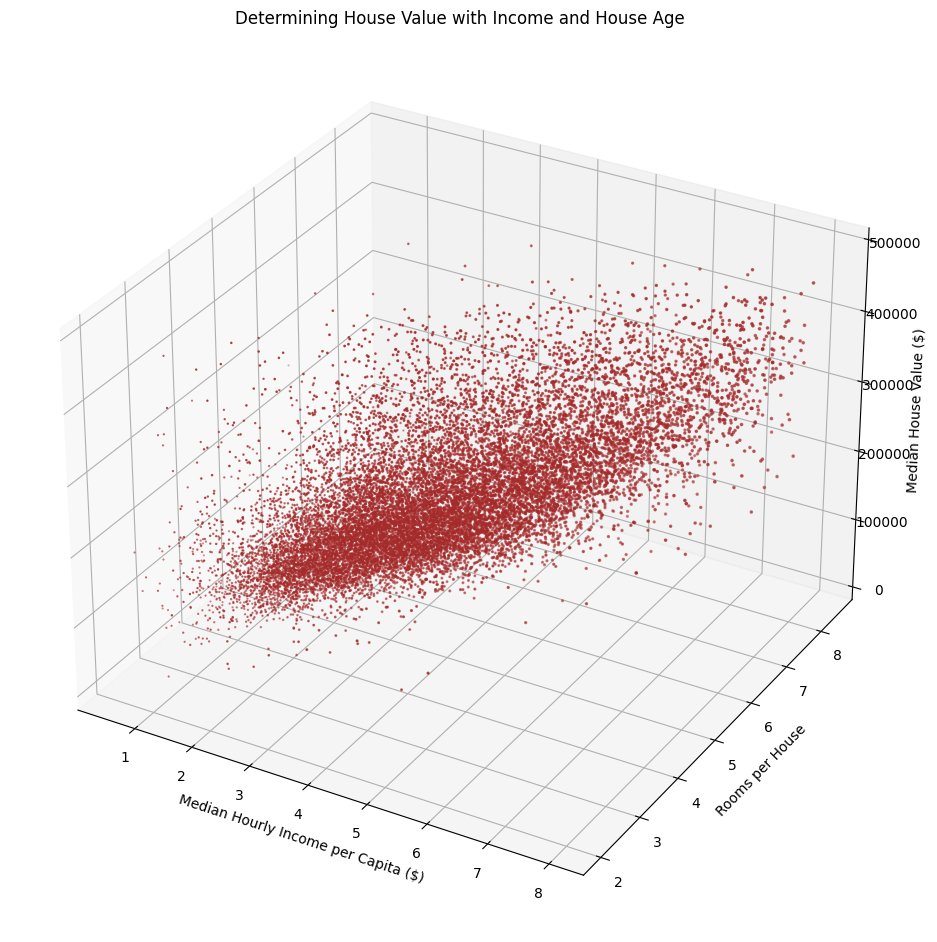

In [42]:
fig = plt.figure(figsize=(9,9))

ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
x = df_10['median_income']
y = df_10['avg_rooms_per_household']
z = df_10['median_house_value']

scatterplot = ax.scatter(x,y,z,s=x/3,c='brown')
plt.title('Determining House Value with Income and House Age')
ax.set_xlabel('Median Hourly Income per Capita ($)')
ax.set_ylabel('Rooms per House')
ax.set_zlabel('Median House Value ($)')

scatterplot

In [43]:
# For the sake of simplicity of this project, I will just do this one data visualization.

# More data visualizations can be done.